<a href="https://colab.research.google.com/github/spandit98/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Soumyadeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description**
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
import seaborn as sns

In [ ]:
#Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv')

# Understanding the dataset

In [ ]:
#Understanding the dataset
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Finding null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Finding duplicate values
df.duplicated().sum()

0

In [ ]:
#Listing down all the features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#Seggregating dependent and independent variable
y = df['price_range']
x = df.drop('price_range', axis = 1)

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

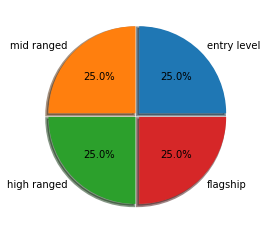

In [ ]:
labels = ["entry level", "mid ranged", "high ranged", "flagship"]
values = df['price_range'].value_counts().values
explode = (0.03,0.03,0.03,0.03)
fig1, ax1 = plt1.subplots()
ax1.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=360, labeldistance=1.1, wedgeprops = {'linewidth': 3})
plt1.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

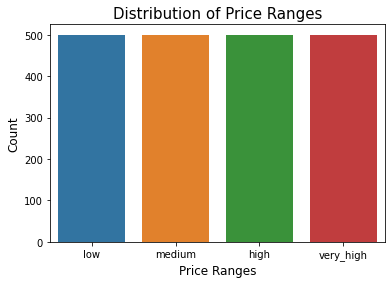

In [ ]:
sns.countplot(df["price_range"])
plt1.title("Distribution of Price Ranges" , fontsize = 15)
plt1.xlabel("Price Ranges" ,  fontsize = 12)
plt1.ylabel("Count" , fontsize = 12)
plt1.xticks(fontsize = 10 , labels= ["low" , "medium" , "high" , "very_high"] , ticks = [0,1,2,3])
plt1.yticks(fontsize = 10)

In [ ]:
cont_col = ['battery_power','px_height','px_width','ram']
discrete = ['clock_speed','fc','int_memory','mobile_wt','talk_time','sc_h','sc_w']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

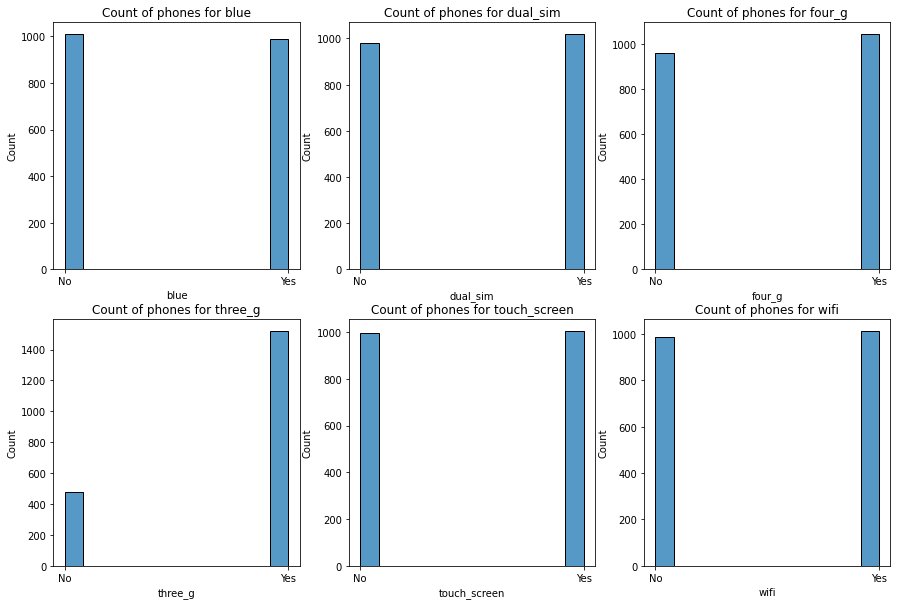

In [ ]:
#Enlisting categorial variables
list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

# visualizing the count of each by running a for loop
plt1.figure(figsize=(15,10))
for index,item in enumerate(list1):
  plt1.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt1.xticks(xtick,label)
  sns.histplot(df[item])
  plt1.title(f'Count of phones for {item}')

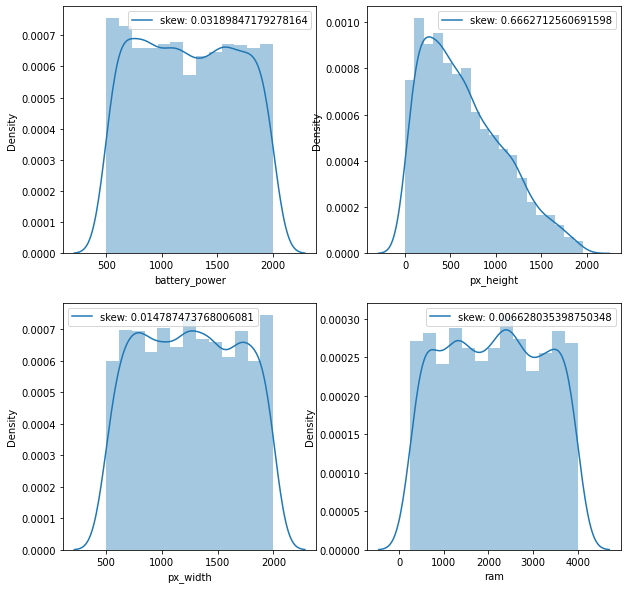

In [ ]:
c= 1
plt1.figure(figsize = (10,10))
for i in cont_col:
    plt1.subplot(2,2,c)
    c=c+1
    sns.distplot(df[i])
    plt1.legend(['skew: '+str(df[i].skew())])

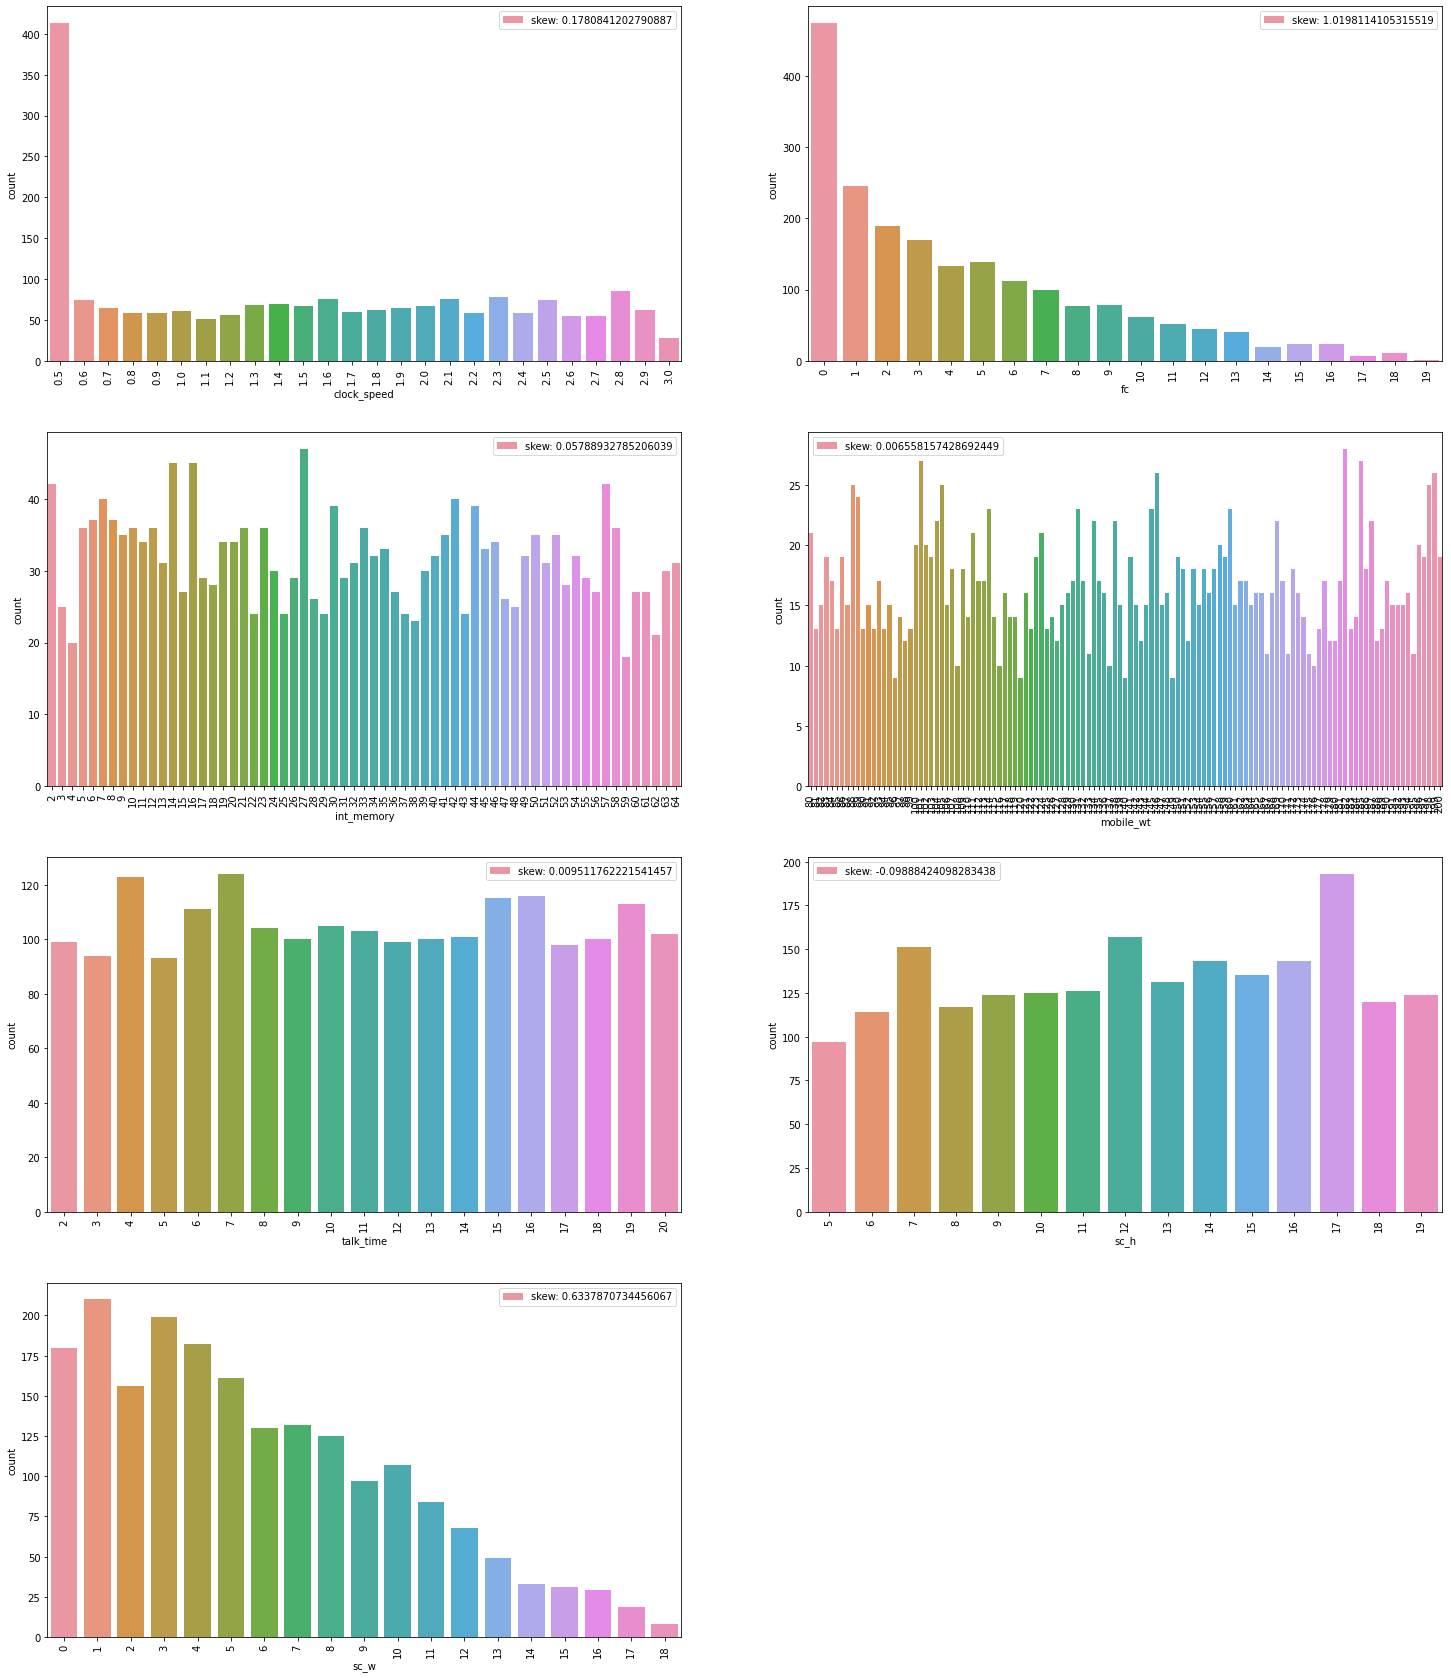

In [ ]:
c= 1
plt1.figure(figsize = (25,30))
for i in discrete:
    plt1.subplot(4,2,c)
    c=c+1
    sns.countplot(df[i])
    
    plt1.legend(['skew: '+str(df[i].skew())])
    plt1.xticks(rotation=90)

In [ ]:
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

blue      dual_sim      four_g      three_g      touch_screen      wifi     
     0    1        0    1      0    1       0    1            0    1    0    1
0  257  243      250  250    241  259     127  373          238  262  252  248
1  255  245      245  255    238  262     122  378          239  261  248  252
2  257  243      251  249    253  247     113  387          265  235  248  252
3  241  259      235  265    225  275     115  385          252  248  238  262

Text(0, 0.5, 'No. of phones')

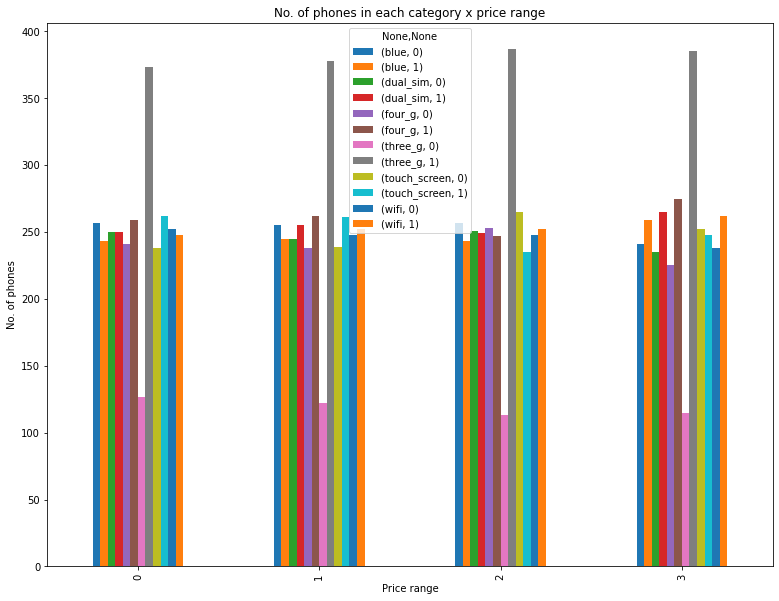

In [ ]:
plt1.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt1.title('No. of phones in each category x price range')
plt1.xlabel('Price range')
plt1.ylabel('No. of phones')

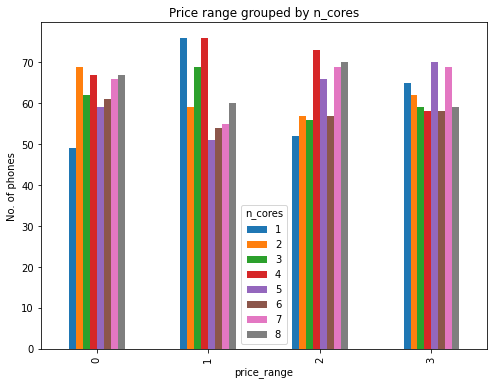

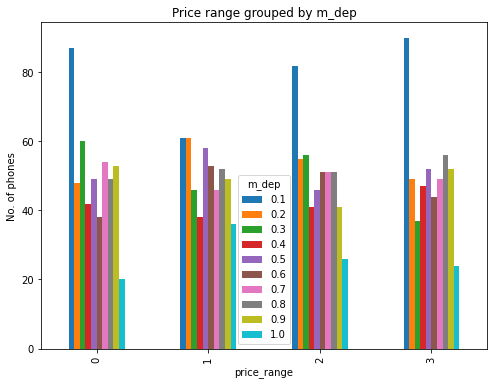

In [ ]:
list1=['n_cores','m_dep']
for item in list1:
  plt1.rcParams['figure.figsize']=(8,6)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt1.title(f'Price range grouped by {item}')
  plt1.ylabel('No. of phones')

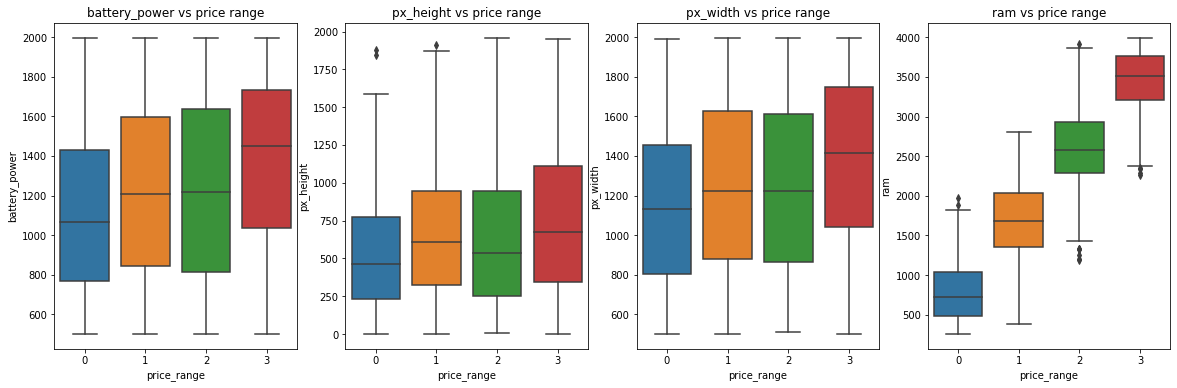

In [ ]:

plt1.figure(figsize=(20,6))
for index,item in enumerate(cont_col):
  xtick=[0,1,2,3]
  plt1.subplot(1,4,index+1)
  plt1.xticks(xtick)
  sns.boxplot(x='price_range',y=item,data=df)
  plt1.title(f'{item} vs price range')

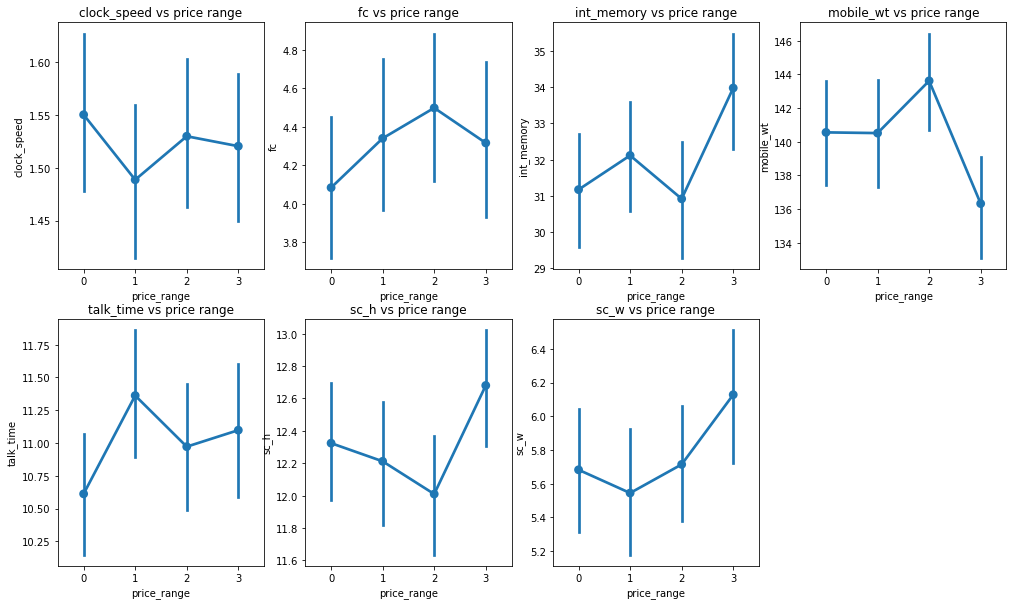

In [ ]:
plt1.figure(figsize=(17,10))
for index,item in enumerate(discrete):
  plt1.subplot(2,4,index+1)
  sns.pointplot(x='price_range',y=item,data=df)
  plt1.title(f'{item} vs price range')

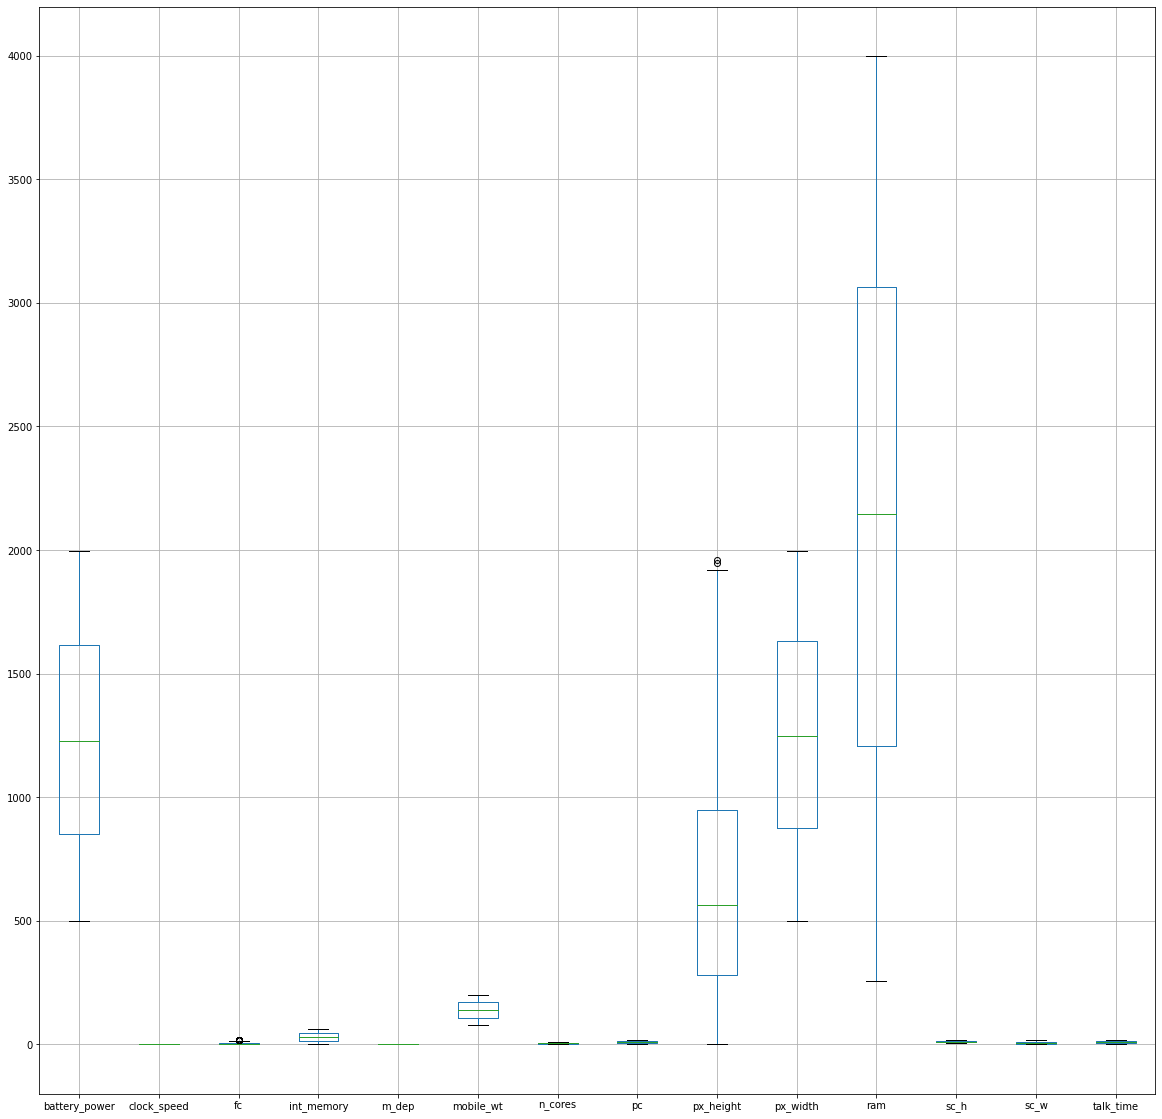

In [ ]:
#finding outliers
fig = plt1.figure(figsize =(20, 20))
data = ['battery_power', 'clock_speed', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
# Creating plot
#plt1.boxplot(data)
boxplot = df.boxplot(column=['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])

# show plot
plt1.show()

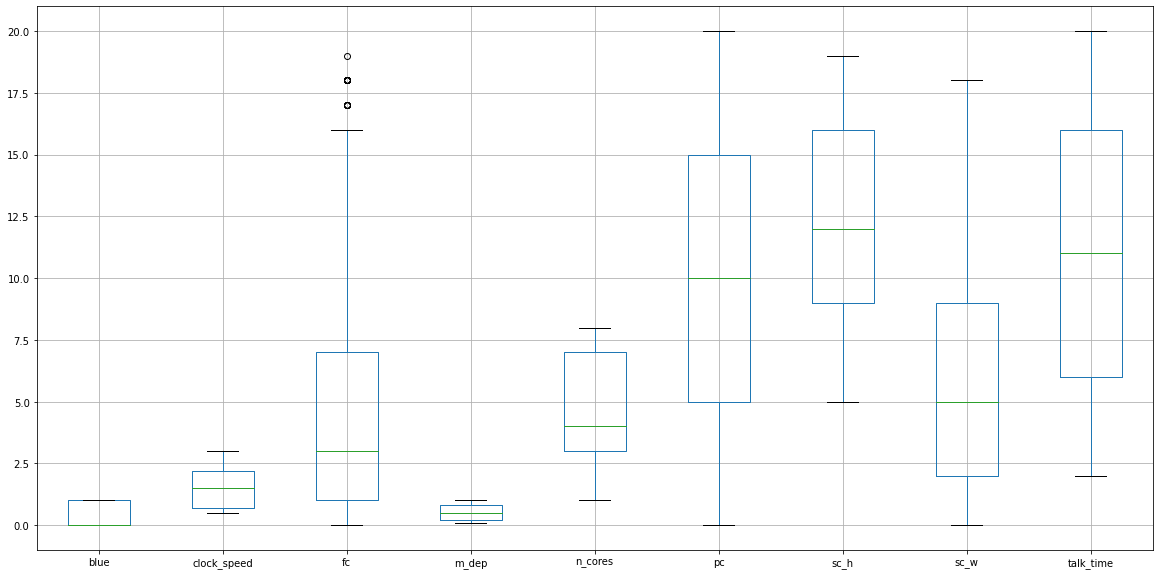

In [ ]:
fig = plt1.figure(figsize =(20, 10))


boxplot = df.boxplot(column=['blue','clock_speed', 'fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time'])
plt1.show()

In [ ]:
new_df = df.copy()

In [ ]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,75])
#  IQR = Q3 — Q1
#  lower_range = Q1 — (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [ ]:
Q1 = new_df["fc"].quantile(0.25)
Q3 = new_df['fc'].quantile(0.991)
IQR = Q3-Q1

new_df = new_df[(new_df['fc'] <= Q3)]

In [ ]:
new_df.shape

(1982, 21)

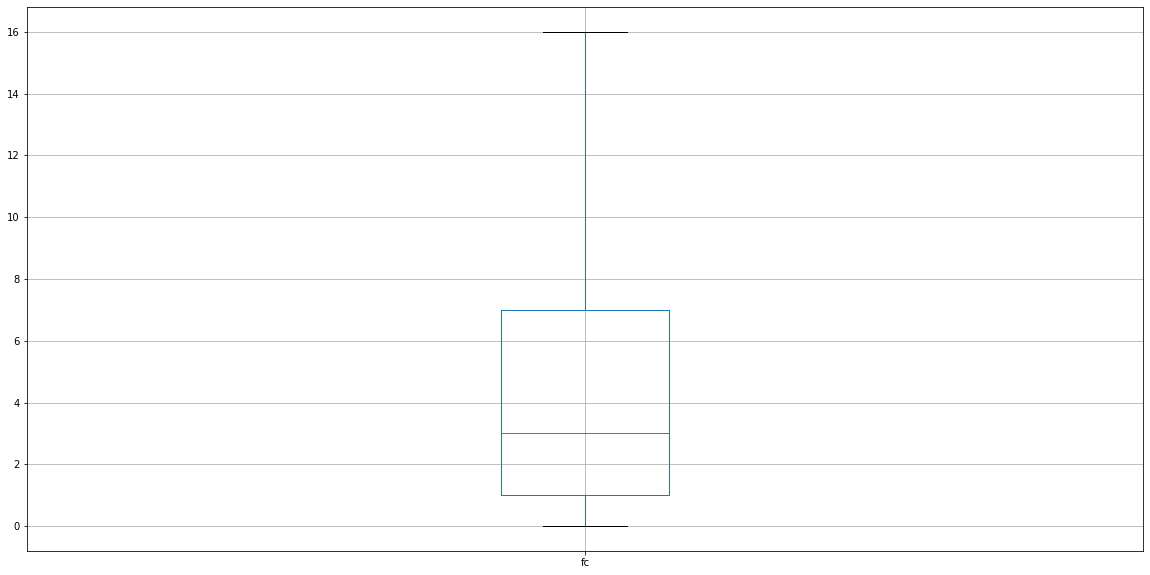

In [ ]:
fig = plt1.figure(figsize =(20, 10))


boxplot = new_df.boxplot(column=['fc'])
plt1.show()

In [ ]:
Q3 = new_df['px_height'].quantile(0.999)

new_df = new_df[(new_df['px_height'] <= Q3)]

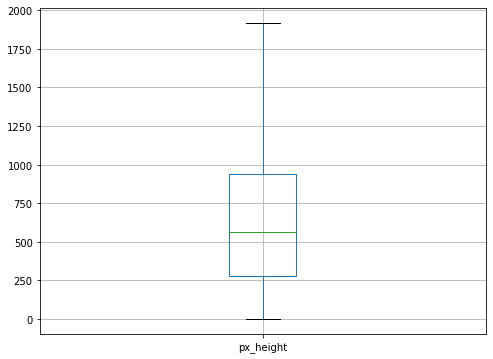

In [ ]:
boxplot = new_df.boxplot(column=['px_height'])

# show plot
plt1.show()

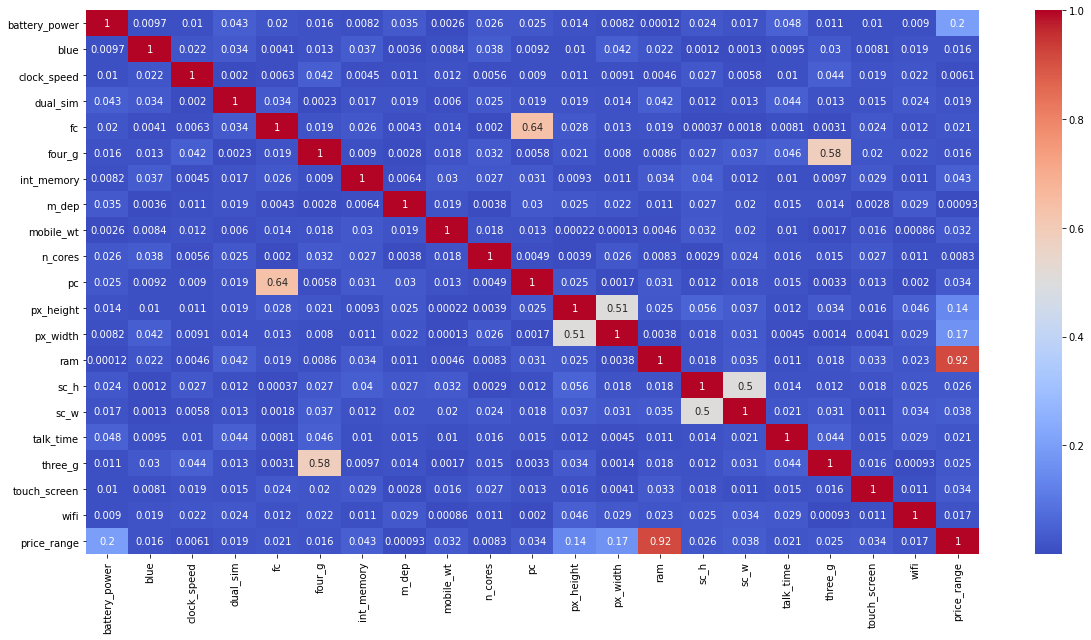

In [ ]:
corr=new_df.corr()
plt1.figure(figsize=(20,10))
sns.heatmap(abs(corr),cmap='coolwarm',annot=True)

In [ ]:
indep_var = df.iloc[:,0:20]  #independent columns
dep_var = df.iloc[:,-1]

In [ ]:
# Select best 15 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(indep_var, dep_var)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(indep_var.columns)
#concat two dataframes for better visualization 
feat_imp = pd.concat([dfcolumns,dfscores],axis=1)
feat_imp.columns = ['Specs','Score']  #naming the dataframe columns
print(feat_imp.nlargest(15,'Score'))  #print 15 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820


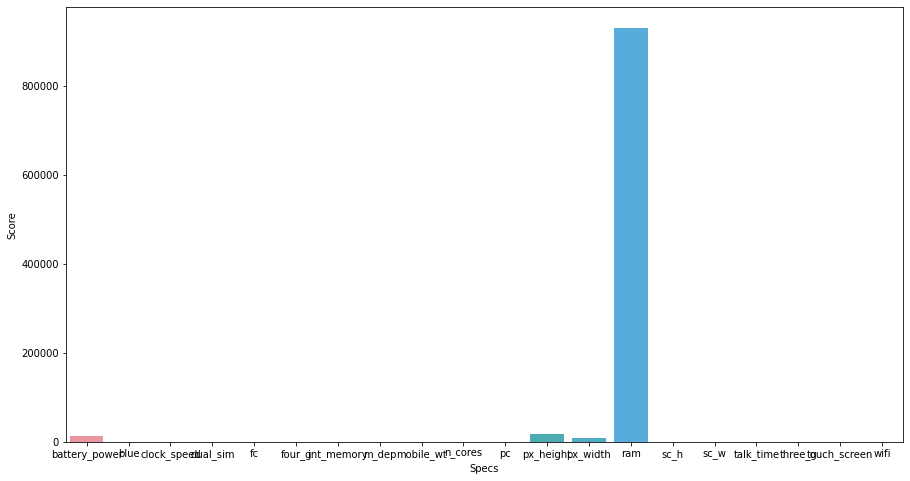

In [ ]:
#Visualising the important features
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feat_imp['Specs'], y=feat_imp['Score'])
plt1.show()

In [ ]:
#Keeping the columns with value above 100 aside to understand the other important features
temp_df= feat_imp.drop(index=[0,11,12,13])

In [ ]:
temp_df

,Specs,Score
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556
10,pc,9.186054


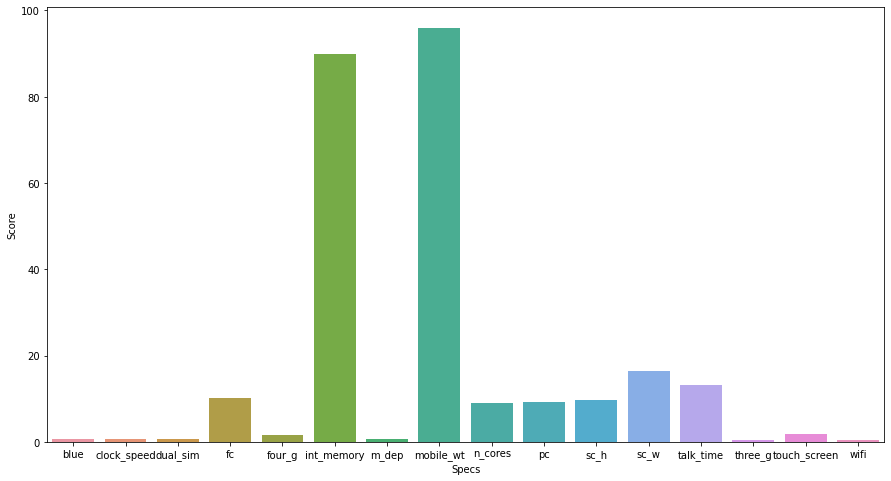

In [ ]:
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=temp_df['Specs'], y=temp_df['Score'])
plt1.show()

In [ ]:
#Dropping the columns with importance value below 9
X=df[['ram', 'battery_power', 'px_height', 'px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','pc','n_cores']]
Y=df['price_range']

In [ ]:
# Appying the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20,random_state=42,stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 12)
(400, 12)
(1600,)
(400,)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clsr = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
clsr.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

0.835

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       105
           1       0.75      0.87      0.81        91
           2       0.77      0.68      0.72        92
           3       0.86      0.89      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [ ]:
class_names = ['low cost','medium cost', 'high cost', 'very high cost']

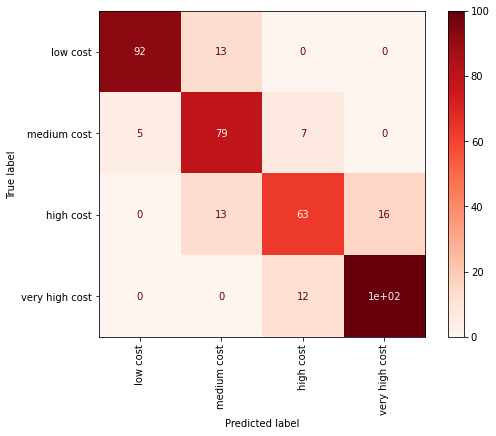

In [ ]:
plot_confusion_matrix(clsr, X_test, y_test, cmap=plt1.cm.Reds, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

In [ ]:
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Specs,Score
0,ram,0.624429
1,battery_power,0.133883
2,px_height,0.081508
3,px_width,0.075872
4,mobile_wt,0.020415


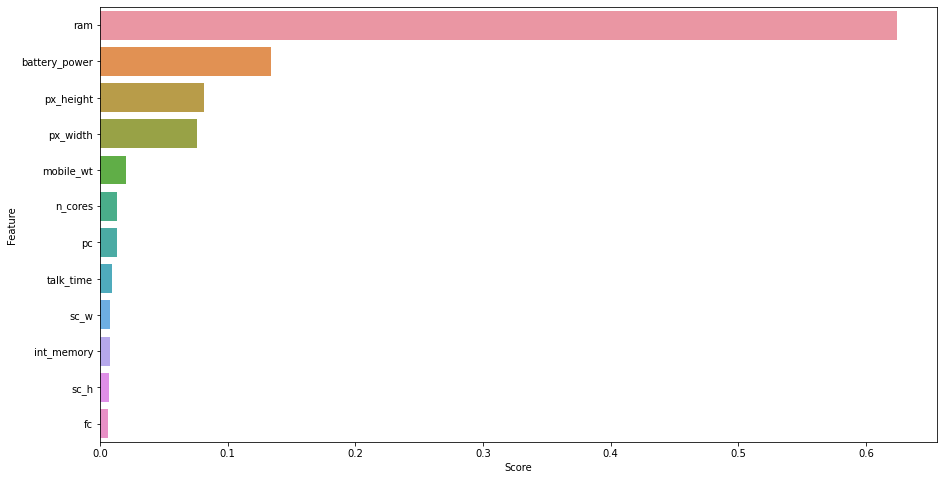

In [ ]:

fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt1.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

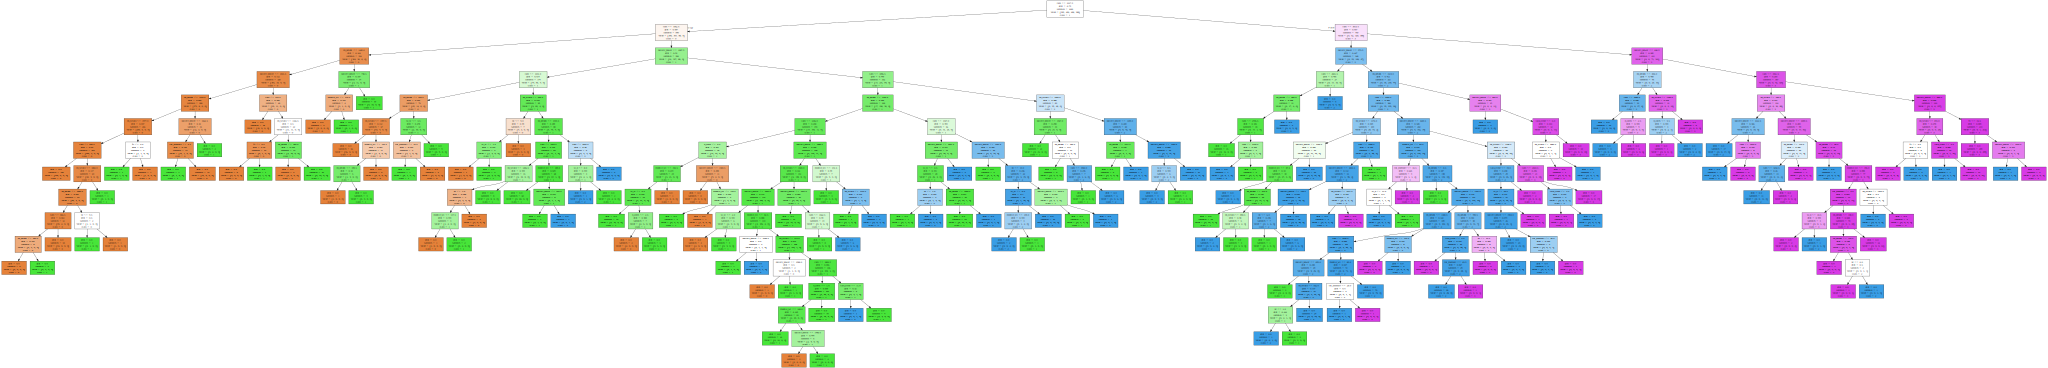

In [ ]:
graph = Source(tree.export_graphviz(clsr, out_file=None
   , feature_names=X.columns, class_names=['0', '1', '2', '3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clsr = RandomForestClassifier(n_estimators=150)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
rf_clsr.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.835

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       105
           1       0.75      0.87      0.81        91
           2       0.77      0.68      0.72        92
           3       0.86      0.89      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



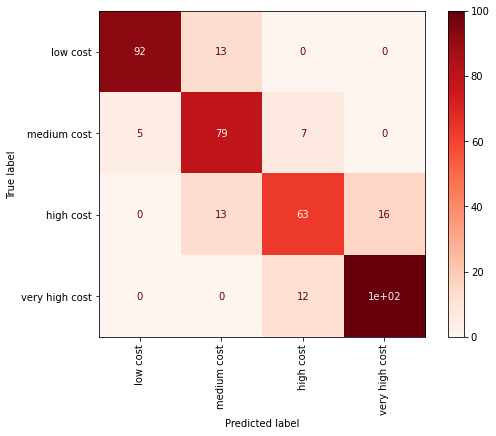

In [ ]:
plot_confusion_matrix(clsr, X_test, y_test, cmap=plt1.cm.Reds, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

In [ ]:
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()


,Specs,Score
0,ram,0.624429
1,battery_power,0.133883
2,px_height,0.081508
3,px_width,0.075872
4,mobile_wt,0.020415


In [ ]:
#Hyperparameter tuning for Random Forest
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[300,500,700],
          'max_depth':[None,10,20,30,40],
          'min_samples_split':[2,6],
          'max_leaf_nodes':[None, 20, 40]
          }

In [ ]:

rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=5)
clsr.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
clsr.best_params_

{'max_depth': 30,
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 700}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clsr.best_score_

0.9019999999999999

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
clsr = clsr.best_estimator_

In [ ]:
clsr.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clsr.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)


0.9125

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [ ]:
clsr = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1)


In [ ]:
clsr.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = clsr.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred)


0.92

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.88      0.92      0.90        91
           2       0.88      0.87      0.87        92
           3       0.95      0.92      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



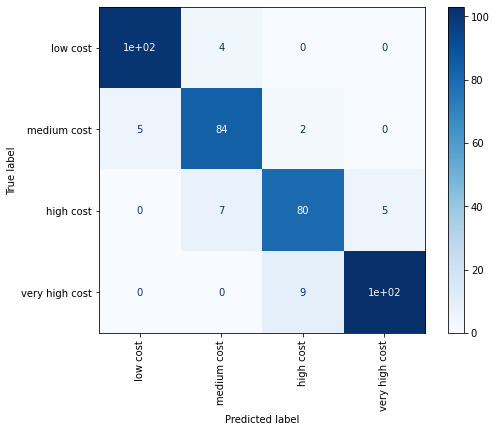

In [ ]:
plot_confusion_matrix(clsr, X_test, y_test, cmap=plt1.cm.Blues, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

In [ ]:
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()


,Specs,Score
0,ram,0.879454
1,battery_power,0.057205
2,px_height,0.028360
3,px_width,0.023105
4,mobile_wt,0.004629


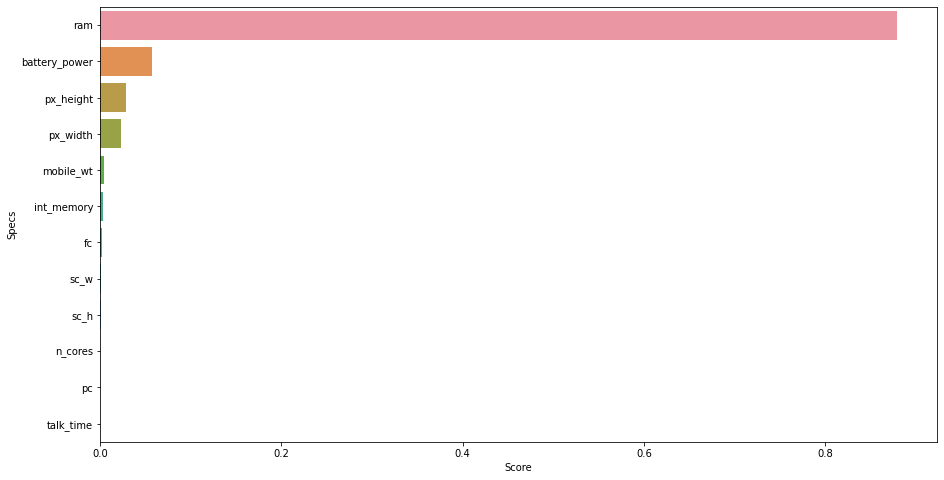

In [ ]:
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Specs'])
plt1.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {'n_estimators':[50,100,300,500],
          'max_depth':[3,8,10],
          'learning_rate':[.01,.1,.005,1],
          'max_features':['sqrt','auto'],
          }

In [ ]:
gb = GradientBoostingClassifier()

clsr = GridSearchCV(gb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
 clsr.best_params_


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
y_pred = clsr.best_estimator_.fit(X_train, y_train).predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred)


0.9075

In [ ]:
#XG Boost
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from xgboost.sklearn import XGBClassifier


In [ ]:
clsr = XGBClassifier(n_estimators=300)


In [ ]:
clsr.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = clsr.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)


0.9125

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.86      0.86      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



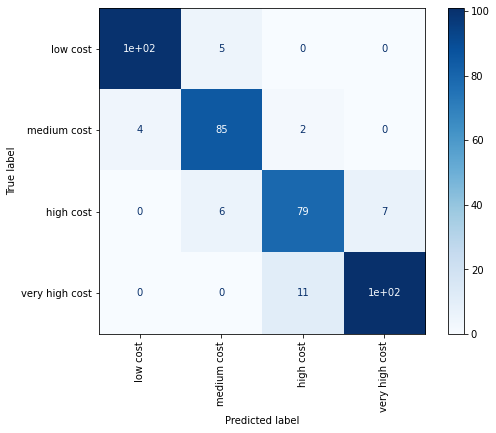

In [ ]:
plot_confusion_matrix(clsr, X_test, y_test, cmap=plt1.cm.Blues, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

In [ ]:

feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()


,Specs,Score
0,ram,0.491168
1,battery_power,0.131877
2,px_height,0.100290
3,px_width,0.075866
4,mobile_wt,0.042623


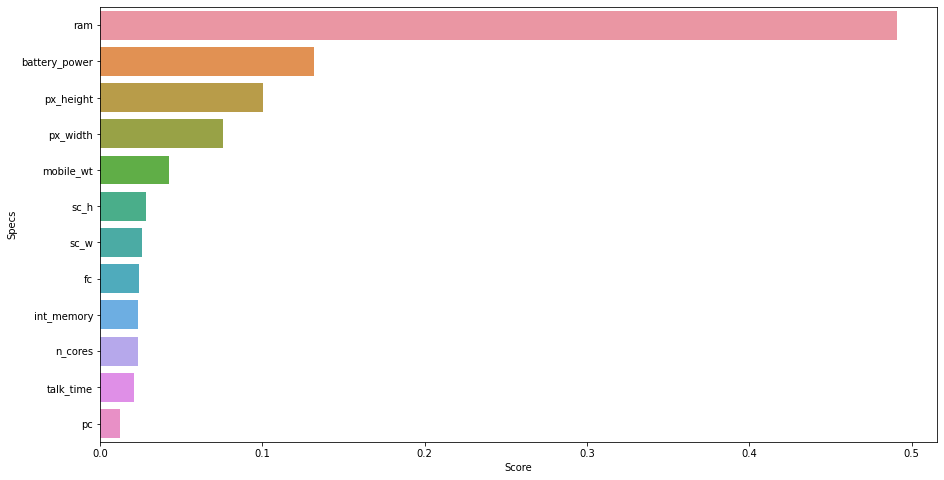

In [ ]:
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Specs'])
plt1.show()

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[300,500,1000],
          'learning_rate':[.1,.01,.05,1],
          }

In [ ]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 1],
                         'n_estimators': [300, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, ret

In [ ]:
clsr.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [ ]:
# let's add some other parameters as well
params = {'n_estimators':[300],
          'learning_rate':[1],
          'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
          }

In [ ]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1], 'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators'

In [147]:
clsr.best_params_


{'learning_rate': 1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300}

In [148]:

# add gamma
params = {'learning_rate':[ 1],
 'max_depth': [9],
 'min_child_weight': [1],
 'n_estimators': [300],
 'gamma':[i/10.0 for i in range(0,5)]}

In [150]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [1], 'max_depth': [9],
                         'min_child_weight': [1], '

In [151]:
clsr.best_params_


{'gamma': 0.0,
 'learning_rate': 1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 300}

In [152]:
params = {'learning_rate':[ 1],
 'max_depth': [9],
 'min_child_weight': [1],
 'n_estimators': [300],
 'gamma':[0],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100, 0, 0.001, 0.005, 0.01, 0.05]}

In [153]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0], 'learning_rate': [1], 'max_depth': [9],
                         'min_child_weight': [1], 'n_estimators': [300],
                         

In [154]:
clsr.best_params_


{'gamma': 0,
 'learning_rate': 1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 300,
 'reg_alpha': 0.005}

In [155]:
# lets check model
clsr.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [156]:
y_pred = clsr.best_estimator_.fit(X_train,y_train).predict(X_test)


In [157]:
accuracy_score(y_test, y_pred)


0.9175

In [158]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.89      0.93      0.91        91
           2       0.87      0.89      0.88        92
           3       0.95      0.90      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

